Homework
==========

1 Prepare
-------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
d=pd.read_csv('../Titanic/train.csv')
d['Title']=d.Name.apply(lambda x:str(x).split(',')[1].split('.')[0].strip())

2 Interesting Plot
------------

### plot Title's distribution

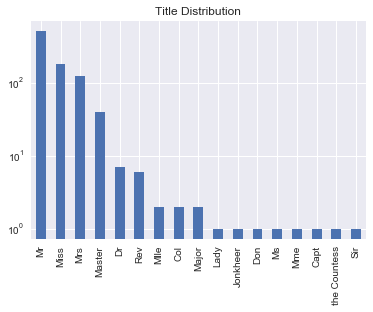

In [3]:
dtitle=d['Title']
dtitle.value_counts(dropna=False).plot(kind='bar',logy=True,title='Title Distribution')

### plot the relationship  between Title and Survived

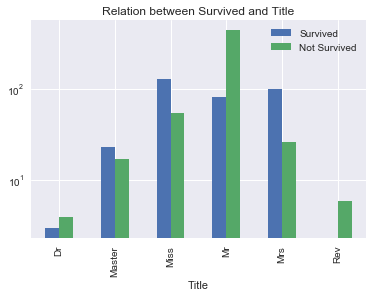

In [4]:
dtemp=d.loc[:,['Title','Survived']][d.Title.isin(['Mr','Mrs','Miss','Master','Dr','Rev'])].copy()
dtemp.head()
dtemp['Not Survived']=dtemp.Survived.apply(lambda x:1-x)
dtemp.groupby('Title').sum().plot.bar(title='Relation between Survived and Title',logy=True)

*Rev* provides a strong predictive power while *Dr* not.

So I'd like to choose to preserve *Mr*,*Miss*,*Mrs*,*Master*,*Rev*, and others will be map to *Rare*.

### Adjust Title for reducing the number of categories

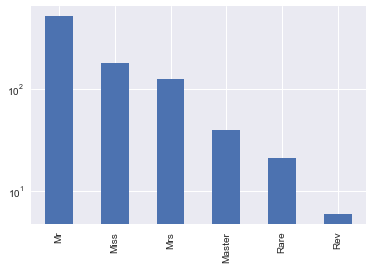

In [5]:
dtemp=d.copy()
dtemp.fillna(0)
dtemp.Title=dtemp.Title.map(lambda x:x if x in ['Mr','Mrs','Miss','Master','Rev'] else 'Rare')
dtemp.Title.value_counts().plot.bar(logy=True)

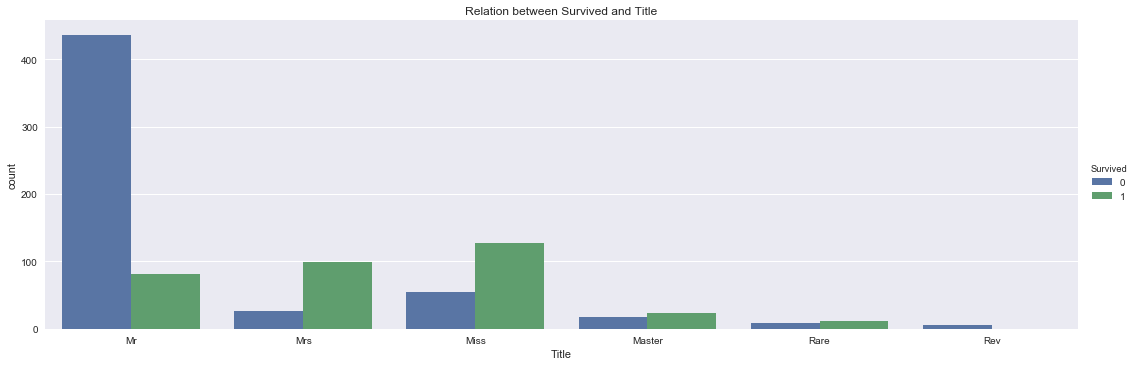

In [6]:
sns.factorplot(x="Title", hue="Survived",data=dtemp, kind="count",size=5,aspect=3,)
plt.title('Relation between Survived and Title')

In [7]:
d['ETitle']=dtemp.Title

### Search possaible pattern between Title, Survived and other Features

In [8]:
dtemp.Fare=np.log(d.Fare+1)

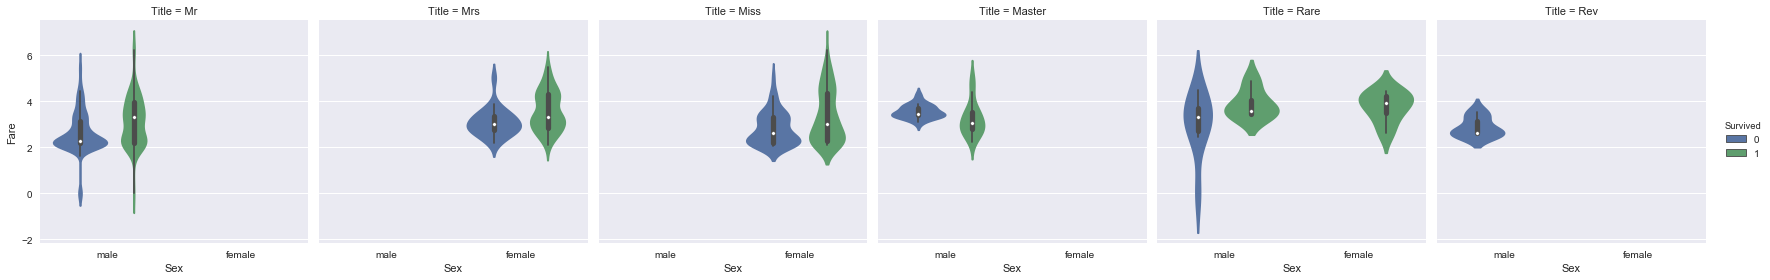

In [9]:
sns.factorplot(x="Sex",y='Fare',hue='Survived', col="Title",data=dtemp, kind="violin")

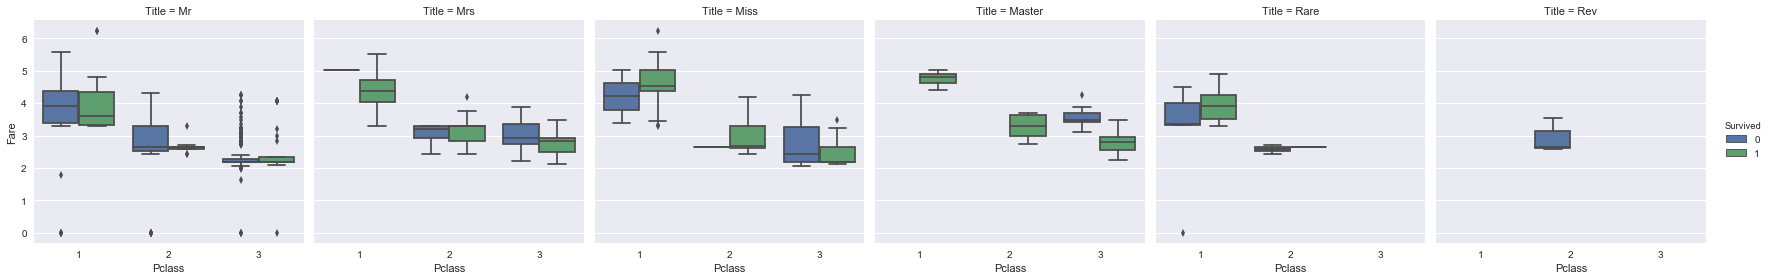

In [10]:
sns.factorplot(x="Pclass",y='Fare',hue='Survived', col="Title",data=dtemp, kind="box")

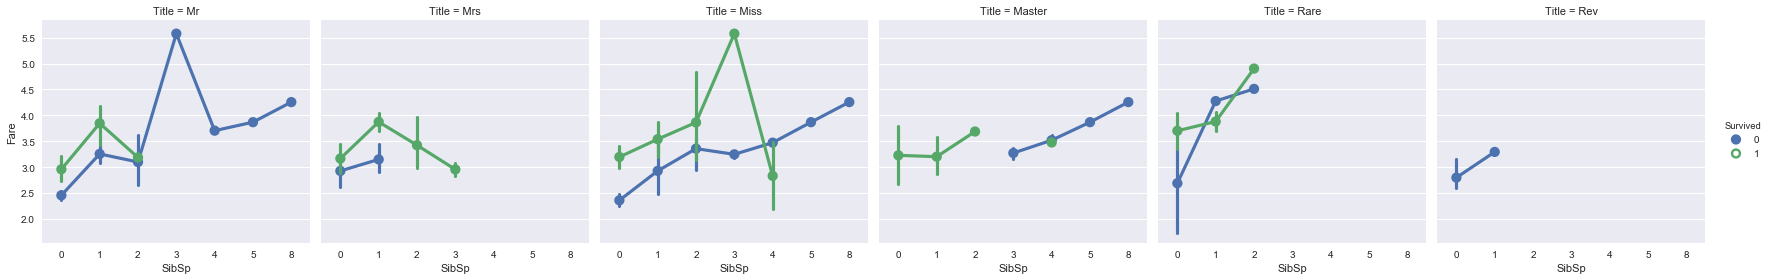

In [11]:
sns.factorplot(x="SibSp",y='Fare',hue='Survived', col="Title",data=dtemp)

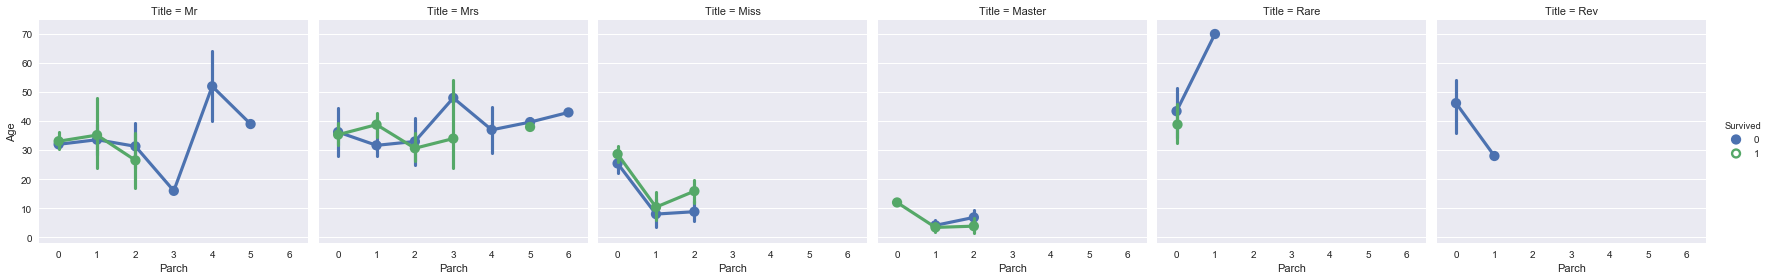

In [12]:
sns.factorplot(x="Parch",y='Age',hue='Survived', col="Title",data=dtemp)

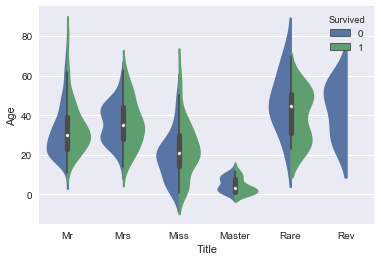

In [13]:
sns.violinplot(x="Title", y="Age", hue="Survived", data=dtemp, split=True)

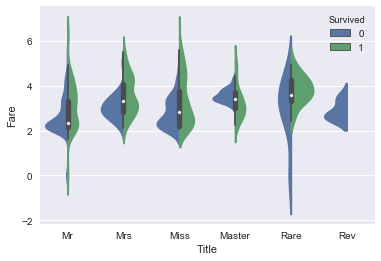

In [41]:
sns.violinplot(x="Title", y=dtemp.Fare, hue="Survived", data=dtemp, split=True)

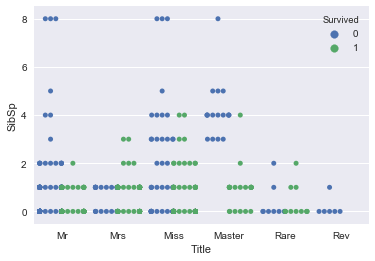

In [15]:
sns.swarmplot(x="Title", y="SibSp", hue="Survived", data=dtemp, split=True)

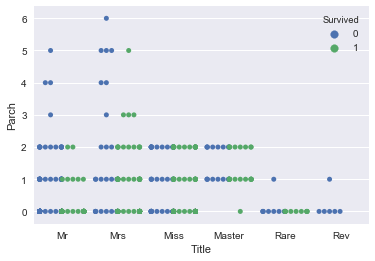

In [16]:
sns.swarmplot(x="Title", y="Parch", hue="Survived", data=dtemp, split=True)

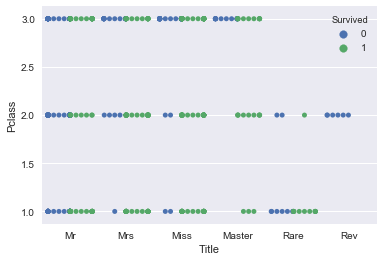

In [17]:
sns.swarmplot(x="Title", y="Pclass", hue="Survived", data=dtemp, split=True)

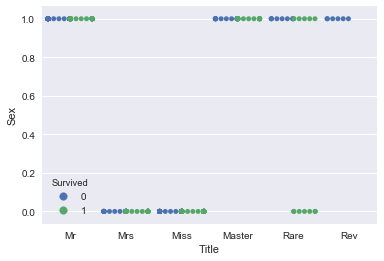

In [18]:
dtemp.Sex=dtemp.Sex.map({'male':1,'female':0})
sns.swarmplot(x="Title", y="Sex", hue="Survived", data=dtemp, split=True)

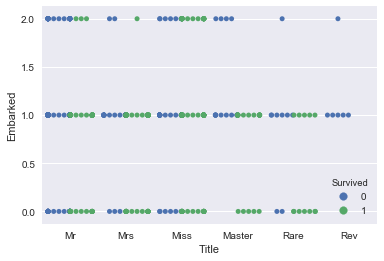

In [19]:
dtemp.Embarked=dtemp.Embarked.map({'Q':2,'S':1,'C':0})
sns.swarmplot(x="Title", y="Embarked", hue="Survived", data=dtemp, split=True)

3 Extract Infomation From Ticket and Cabin
---------------------------------------------

### Extract Ticket by finding ticket length

Do mapping and find out outliers

In [29]:
dticket=d.Ticket.map(lambda x:x.split(' ')[-1])
dticket[~dticket.str.isdigit()]

179    LINE
271    LINE
302    LINE
597    LINE
Name: Ticket, dtype: object

Dealing with outliers

In [30]:
dticket=dticket.map(lambda x:len(x) if x != 'LINE' else 0)

Watch distribution

6    423
5    246
4    165
7     44
3      7
0      4
1      2
Name: Ticket, dtype: int64


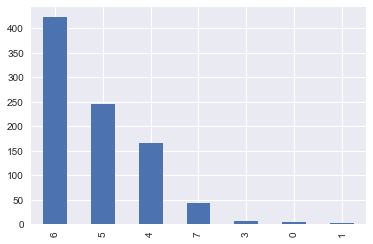

In [31]:
print dticket.value_counts()
dticket.value_counts().plot.bar()

Combine small category

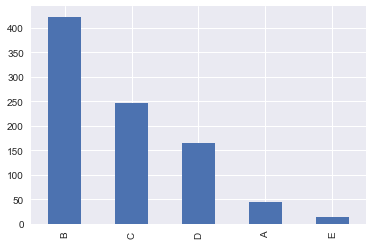

In [32]:
ETicket=dticket.map({7:'A',6:'B',5:'C',4:'D',3:'E',1:'E',0:'E'})
ETicket.value_counts().plot.bar()

In [33]:
d['ETicket']=ETicket

4 Extract Cabin by finding Initial letter
---------------------------------------------

Do mapping and map NaN direct to n

In [34]:
dcabin=d.Cabin.map(lambda x:str(x)[0])

Plot distribution of Ecabin

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


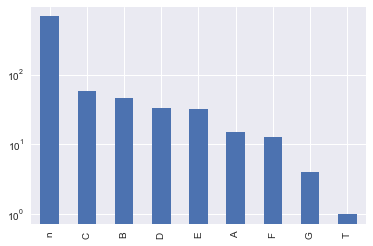

In [35]:
print dcabin.value_counts()
dcabin.value_counts().plot.bar(logy=True)

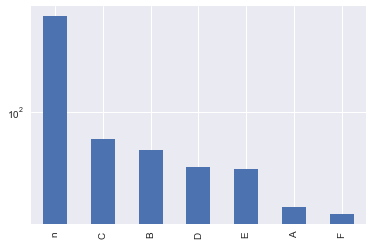

In [36]:
Edcabin=dcabin.map(lambda x: x if x not in ['G','T'] else 'n')
Edcabin.value_counts().plot.bar(logy=True)

In [37]:
d['ECabin']=Edcabin

5 Encoding Dataset
---------------------

In [39]:
d['EFare']=np.log(d.Fare+1)

In [43]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ETitle,ETicket,ECabin,EFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,C,n,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,C,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,A,n,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,B,C,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,B,n,2.202765


In [52]:
num=['SibSp','Parch','EFare']
cat=['Pclass','Sex','ETicket','ECabin','ETitle','Embarked']
target='Age'

In [64]:
data=d.loc[:,num+cat]

In [65]:
data.Embarked.fillna(method='pad',inplace=True)

In [223]:
predict_data=data[d.Age.isnull()].copy()
dataset=data[d.Age.notnull()].copy()
dataset_full=pd.get_dummies(dataset, columns=cat, drop_first=False)
dataset=pd.get_dummies(dataset, columns=cat, drop_first=True)

In [224]:
dataset_target=d.Age[d.Age.notnull()].copy()

In [225]:
dataset_norm=(dataset-dataset.mean())/dataset.std()
dataset_mean=dataset.mean()
dataset_std=dataset.std()

6 Fit Model
---------------------

In [108]:
from sklearn import linear_model,svm
from sklearn import preprocessing, model_selection
from sklearn import metrics

In [109]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset_norm, dataset_target, test_size=0.2, random_state=0)

In [110]:
X_train.shape, y_train.shape

((571, 23), (571L,))

In [111]:
X_test.shape, y_test.shape

((143, 23), (143L,))

### Linear Regression

Fit Model

In [120]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print('R2 Score : '+str(model.score(X_test, y_test)))

R2 Score : 0.392416900103


View Coefficients

Intercept: 29.7537304025
Coefficients:


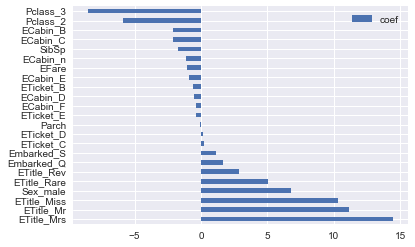

In [113]:
print 'Intercept:',model.intercept_
print 'Coefficients:'
coefs_df = pd.DataFrame(index=X_train.columns,data=model.coef_, columns=['coef']);
coefs_df.sort_values('coef', ascending=False).plot.barh();

Cross Validate

In [126]:
scores = model_selection.cross_val_score(model, dataset_norm, dataset_target, cv=5)
print('Cross Validated R2 Score : '+str(scores.mean()))

Cross Validated R2 Score : 0.374445406977


### Lasso Regression

Fit Model

In [144]:
model = linear_model.Lasso()
model.fit(X_train, y_train)
print('R2 Score : '+str(model.score(X_test, y_test)))

 R2 Score : 0.339178377539


View Coefficients

Intercept: 29.7155074409
Coefficients:


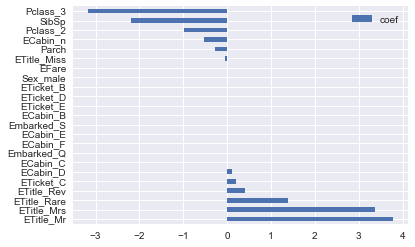

In [145]:
print 'Intercept:',model.intercept_
print 'Coefficients:'
coefs_df = pd.DataFrame(index=X_train.columns,data=model.coef_, columns=['coef']);
coefs_df.sort_values('coef', ascending=False).plot.barh();

Grid Search

In [146]:
log_arr=np.arange(0,-10,-1)
log_arr=np.e**log_arr
param_grid = [{'alpha': log_arr}]

In [147]:
model = model_selection.GridSearchCV(linear_model.Lasso(), param_grid, cv=5)
model.fit(X_train, y_train)
print('R2 Score : '+str(model.score(X_test, y_test)))

R2 Score : 0.404242874639


In [154]:
model.best_estimator_.coef_

array([ -1.82038425,  -0.15071701,  -0.82987224,  -5.56246176,
        -8.14447115,   2.61260175,  -0.57530634,   0.14898395,
         0.        ,  -0.27433004,  -1.45990538,  -1.3017045 ,
         0.        ,  -0.2885084 ,  -0.10440066,  -0.        ,
         6.06439478,  10.27336075,  10.63318551,   4.18282174,
         2.61284681,   1.49490738,   0.96318173])

Best Hyper Param: {'alpha': 0.049787068367863951}
Best Intercept: 29.7489440064
Coefficients:


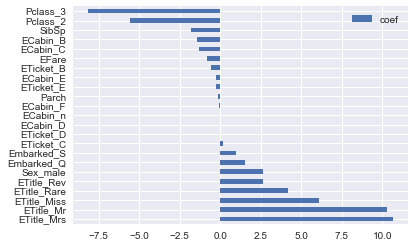

In [155]:
print 'Best Hyper Param:',model.best_params_
print 'Best Intercept:',model.best_estimator_.intercept_
print 'Coefficients:'
coefs_df = pd.DataFrame(index=X_train.columns,data=model.best_estimator_.coef_, columns=['coef']);
coefs_df.sort_values('coef', ascending=False).plot.barh();

Cross Validate

In [156]:
scores = model_selection.cross_val_score(model.best_estimator_, dataset_norm, dataset_target, cv=5)
print('Cross Validated R2 Score : '+str(scores.mean()))

Cross Validated R2 Score : 0.374261453861


### Support Vector Machine (SVM)

Fit Model

In [132]:
model = svm.SVR(C=100)
model.fit(X_train, y_train)
print('R2 Score : '+str(model.score(X_test, y_test)))

R2 Score : 0.20841302535


Grid Search

Here takes a lot of time!

In [178]:
log_arr_1=np.arange(0,-10,-1)
log_arr_1=np.e**log_arr_1
log_arr_2=np.arange(-6,-11,-1)
log_arr_2=np.e**log_arr_2
param_grid = [
  {'C': log_arr_1, 'kernel': ['linear']},
  {'C': log_arr_1, 'gamma': log_arr_2, 'kernel': ['rbf','sigmoid']},
  {'C': log_arr_1, 'gamma': log_arr_2, 'degree':[2,3,4], 'kernel': ['poly']}
 ]

In [179]:
model = model_selection.GridSearchCV(svm.SVR(), param_grid, cv=5)

In [180]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': array([  1.00000e+00,   3.67879e-01,   1.35335e-01,   4.97871e-02,
         1.83156e-02,   6.73795e-03,   2.47875e-03,   9.11882e-04,
         3.35463e-04,   1.23410e-04])}, {'kernel': ['rbf', 'sigmoid'], 'C': array([  1.00000e+00,   3.67879e-01,   1.35335e-01...'gamma': array([  2.47875e-03,   9.11882e-04,   3.35463e-04,   1.23410e-04,
         4.53999e-05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [181]:
print('R2 Score : '+str(model.score(X_test, y_test)))

R2 Score : 0.404499514226


In [182]:
print 'Best Hyper Param:',model.best_params_
print 'Best Intercept:',model.best_estimator_.intercept_

Best Hyper Param: {'kernel': 'linear', 'C': 1.0}
Best Intercept: [ 28.55388994]


Cross Validate

In [183]:
scores = model_selection.cross_val_score(model.best_estimator_, dataset_norm, dataset_target, cv=5)
print('Cross Validated R2 Score : '+str(scores.mean()))

Cross Validated R2 Score : 0.341030578746


### Other Models

Fit Model

In [261]:
from sklearn import tree,neighbors,ensemble, neural_network

PCA Dim Reduction

In [199]:
#from sklearn import decomposition
#dn=dataset_norm.copy()
#pca = decomposition.PCA()
#dn_pca = pca.fit_transform(dn)
#dn_pca

Regression Tree

In [247]:
model = tree.DecisionTreeRegressor(criterion='mae')
scores = model_selection.cross_val_score(model, dataset_norm, dataset_target, cv=5)
print('Cross Validated R2 Score : '+str(scores.mean()))

Cross Validated R2 Score : -0.0712292750987


Knn

In [244]:
model = neighbors.KNeighborsRegressor(n_neighbors=38)
scores = model_selection.cross_val_score(model, dataset_norm, dataset_target, cv=5)
print('Cross Validated R2 Score : '+str(scores.mean()))

Cross Validated R2 Score : 0.243540133439


Random Forest

In [272]:
log_arr=np.arange(5,20,1)
param_grid = [{'n_estimators': log_arr}]
model = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
print model.best_params_
print('R2 Score : '+str(model.best_estimator_.score(X_test, y_test)))

{'n_estimators': 14}
R2 Score : 0.235508850641


MLP

Here takes a lot of time!

In [277]:
log_arr=np.arange(5,20,1)
param_grid = [{'hidden_layer_sizes':[(150,150),(200,100),(200,200),(350,350),(300,300),(100,100,100),(150,150,150)],
               'activation':['logistic','relu','tanh']}]
model = model_selection.GridSearchCV(neural_network.MLPRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
print model.best_params_
print('R2 Score : '+str(model.best_estimator_.score(X_test, y_test)))

{'activation': 'tanh', 'hidden_layer_sizes': (150, 150, 150)}
R2 Score : 0.29864236357


7 Impute best Age prediction to original data
----------------------------------------------

### Retrain a Model with best sets and full data

In [312]:
predict_data=data[d.Age.isnull()].copy()
predict_data=pd.get_dummies(predict_data, columns=cat, drop_first=True)
predict_data.insert(20, 'ETitle_Rev', 0)
predict_data=(predict_data-dataset_mean)/dataset_std

In [316]:
model = svm.SVR(**{'kernel': 'linear', 'C': 1.0})
model.fit(dataset_norm, dataset_target)
Age=np.round(model.predict(predict_data))

In [320]:
dfull=d.copy()

In [321]:
dfull.at[dfull.Age.isnull(),'Age'] = Age

In [323]:
dfull.Age.isnull().sum()

0

In [325]:
dfull.to_csv('../Titanic/train_full.csv')

In [327]:
d_clean=dfull.loc[:,num+cat]

In [330]:
d_clean=pd.get_dummies(d_clean, columns=cat, drop_first=True)

In [331]:
d_clean.to_csv('../Titanic/train_clean.csv')

8 Future Works
--------------

Feature's Dimentionality needed to be reduced.

Age can be segmented into slices and then combined with Sex to be Man Woman Child OldMan OldWoman...

Etc.